# Adm No: 2222291
# Name: Toh Kien Yu

# Background Research

### Customer Segmentation is the process to group customers who share the same characteristics in order to understand the customer's spending behaviour and is an important to effectively market to a specific target audience . This will allow the shopping mall to personalize marketing to specific groups and boost profability.<br><br>We can group customers based on factors such as gender,age, income, amount spent and their interests.

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Data Loading

In [2]:
df = pd.read_csv('dataset/Customer_Dataset.csv')
df.head(5)

,CustomerID,Gender,Age,Income (k$),How Much They Spend
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Data Exploration

In [3]:
print('Dataset Shape')
print(df.shape)

Dataset Shape
(200, 5)


In [4]:
df.describe()

,CustomerID,Age,Income (k$),How Much They Spend
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   CustomerID           200 non-null    int64 
 1   Gender               200 non-null    object
 2   Age                  200 non-null    int64 
 3   Income (k$)          200 non-null    int64 
 4   How Much They Spend  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


## No null values in the dataset

In [6]:
# No Null Values
df.isnull().sum()

CustomerID             0
Gender                 0
Age                    0
Income (k$)            0
How Much They Spend    0
dtype: int64

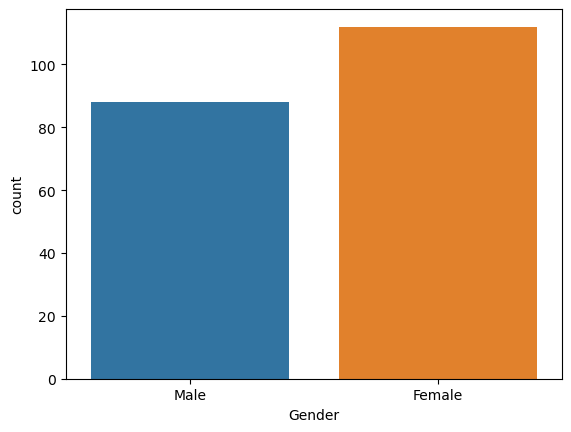

In [7]:
sns.countplot(data=df, x='Gender')
plt.show()

### There are more females than males in this dataset

<Axes: xlabel='Gender', ylabel='Income (k$)'>

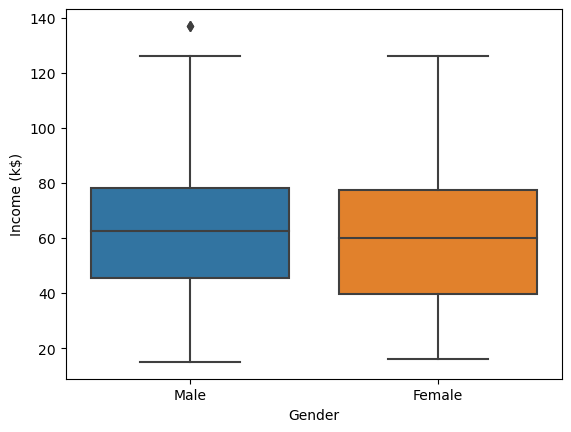

In [8]:
sns.boxplot(data=df, x = 'Gender', y='Income (k$)')

### Median income of male is slightly higher than female, with a outlier.

<Axes: xlabel='Gender', ylabel='How Much They Spend'>

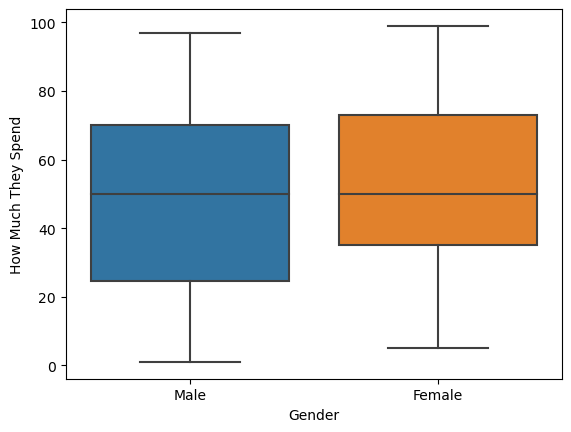

In [9]:
#Calculate the median
sns.boxplot(data=df, x = 'Gender', y='How Much They Spend')

### Median of how much a male and female spent is about the same.

<Axes: xlabel='Age', ylabel='Count'>

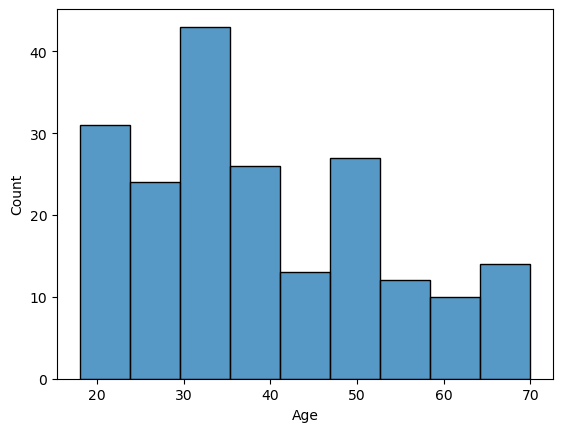

In [10]:
sns.histplot(data=df, x='Age')

<Axes: xlabel='Income (k$)', ylabel='Count'>

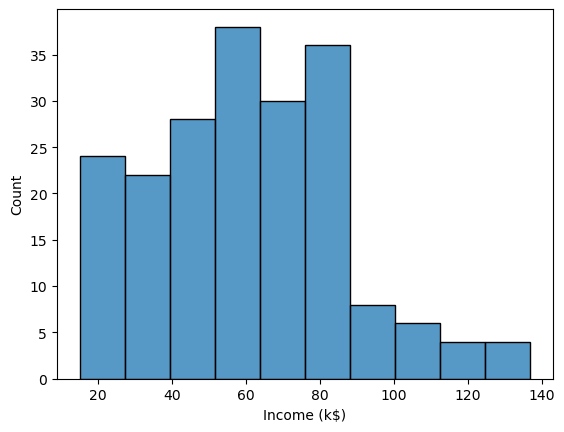

In [11]:
sns.histplot(data=df, x='Income (k$)')

<Axes: xlabel='How Much They Spend', ylabel='Count'>

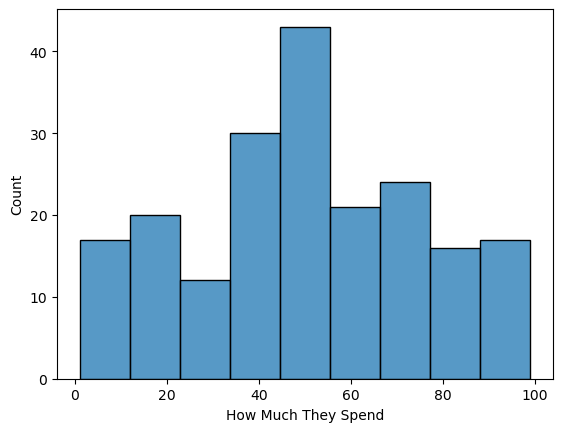

In [12]:
sns.histplot(data=df, x='How Much They Spend')

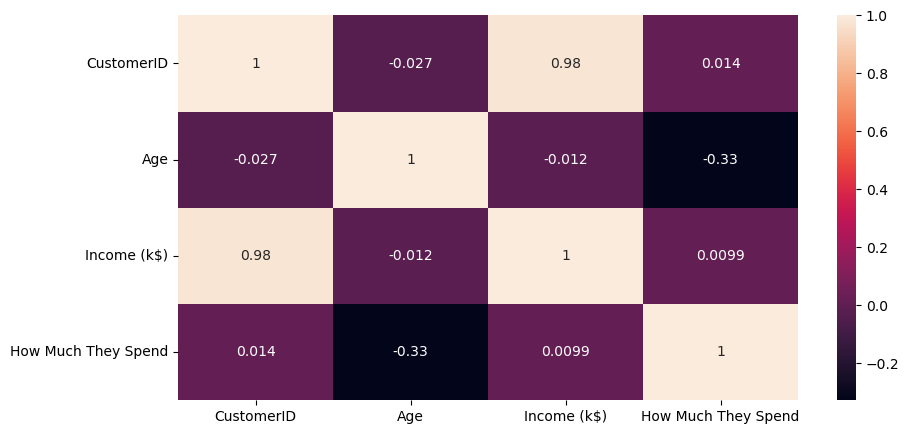

In [13]:
plt.subplots(figsize=(10,5))
sns.heatmap(df.corr(), annot=True)
plt.show()

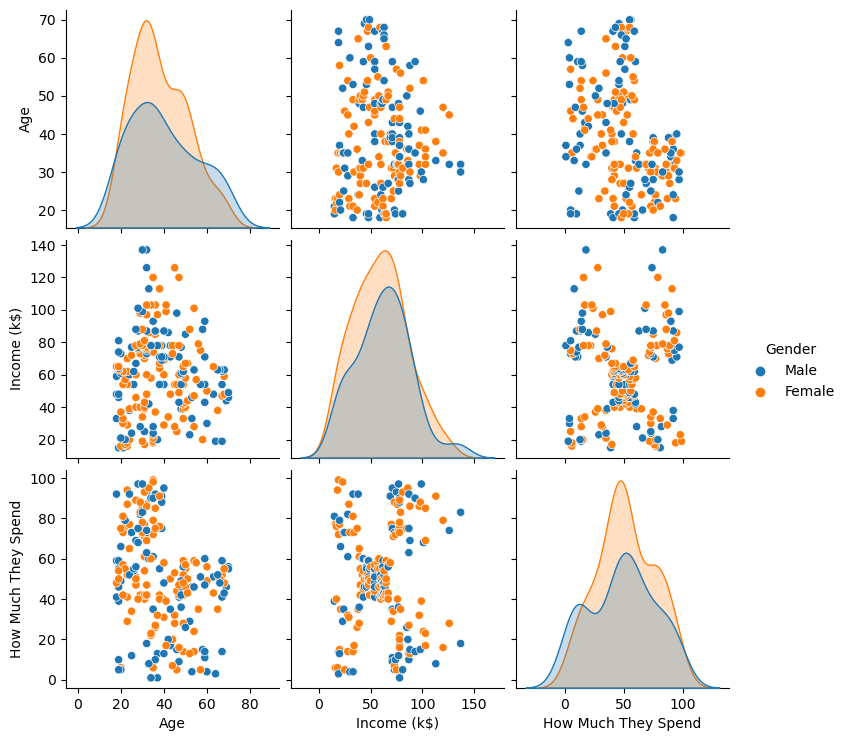

In [14]:
sns.pairplot(df.drop('CustomerID',axis=1), hue='Gender')
plt.show()

### From the pair plot, gender does not seem to have any correlation to age, income and how much they spend. Hence we will drop the column Gender

## Clustering

## 1. Gender is dropped as there no corelation to the variables.<br>2. Spending Ratio column is created<br>3. Income To Age Ratio column is created

In [15]:
hDF = df.copy()

#Feature Selection
data_reduced = hDF.drop(['CustomerID','Gender'], axis=1)

#Feature Extraction
data_reduced['Spending Ratio'] = data_reduced['How Much They Spend']/(data_reduced['Income (k$)'])
data_reduced['Income To Age Ratio'] = data_reduced['Income (k$)']/(data_reduced['Age'])

data_reduced.head(5)

,Age,Income (k$),How Much They Spend,Spending Ratio,Income To Age Ratio
0,19,15,39,2.600000,0.789474
1,21,15,81,5.400000,0.714286
2,20,16,6,0.375000,0.800000
3,23,16,77,4.812500,0.695652
4,31,17,40,2.352941,0.548387


In [16]:
columns = data_reduced.columns.tolist()
columns

['Age',
 'Income (k$)',
 'How Much They Spend',
 'Spending Ratio',
 'Income To Age Ratio']

## StandardScaler is used to scale the data before we perform PCA

### Data is then standardized to so that the features are centred around 0 with a standard deviation of 1.

In [17]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
df_std = std_scaler.fit_transform(data_reduced)
df_std

array([[-1.42456879e+00, -1.73899919e+00, -4.34801480e-01,
         1.57724431e+00, -1.01034449e+00],
       [-1.28103541e+00, -1.73899919e+00,  1.19570407e+00,
         4.46095966e+00, -1.08929603e+00],
       [-1.35280210e+00, -1.70082976e+00, -1.71591298e+00,
        -7.14279492e-01, -9.99291276e-01],
       [-1.13750203e+00, -1.70082976e+00,  1.04041783e+00,
         3.85589439e+00, -1.10886228e+00],
       [-5.63368514e-01, -1.66266033e+00, -3.95979919e-01,
         1.32279884e+00, -1.26349878e+00],
       [-1.20926872e+00, -1.66266033e+00,  1.00159627e+00,
         3.50376003e+00, -1.02792915e+00],
       [-2.76301755e-01, -1.62449091e+00, -1.71591298e+00,
        -7.57191922e-01, -1.29930712e+00],
       [-1.13750203e+00, -1.62449091e+00,  1.70038436e+00,
         4.27786662e+00, -1.01755311e+00],
       [ 1.80493225e+00, -1.58632148e+00, -1.83237767e+00,
        -9.37875841e-01, -1.52760042e+00],
       [-6.35135204e-01, -1.58632148e+00,  8.46310024e-01,
         2.80228128e+00

In [18]:
X = pd.DataFrame(df_std,columns=columns)
X

,Age,Income (k$),How Much They Spend,Spending Ratio,Income To Age Ratio
0,-1.424569,-1.738999,-0.434801,1.577244,-1.010344
1,-1.281035,-1.738999,1.195704,4.460960,-1.089296
2,-1.352802,-1.700830,-1.715913,-0.714279,-0.999291
3,-1.137502,-1.700830,1.040418,3.855894,-1.108862
4,-0.563369,-1.662660,-0.395980,1.322799,-1.263499
...,...,...,...,...,...
195,-0.276302,2.268791,1.118061,-0.422475,1.760854
196,0.441365,2.497807,-0.861839,-0.871625,1.100820
197,-0.491602,2.497807,0.923953,-0.495630,2.295258
198,-0.491602,2.917671,-1.250054,-0.965176,2.656214


## Perform PCA to reduce the dimension of the data

In [19]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5).fit(X)
pca_samples = pca.transform(X)
pca_samples[0:5,:]

array([[ 2.24160878, -0.82718437,  1.69176821,  0.32557371, -0.2719201 ],
       [ 4.00011316, -2.88179639,  0.35799028,  1.65422649,  0.10642872],
       [ 0.87188442,  0.92486103,  2.60318454, -0.69833627, -0.54427694],
       [ 3.67359239, -2.44279488,  0.38761696,  1.32333351,  0.05208412],
       [ 2.30647824, -0.13856926,  1.07769193,  0.25420849, -0.14058562]])

In [20]:
# Computes the PCs and percentage variance explained
# Pass original data and returns of PCA to this function.
# This function returns a table summarising the eigenvalues, % variance explained, cumulative % variance explained and PCs

def pca_results(data, pca):
    
    # Dimension indexing
    dimensions = ['PC {}'.format(i) for i in range(1,len(pca.components_)+1)]
    
    # PCA components
    components = pd.DataFrame(np.round(pca.components_, 4), columns = data.keys()) 
    components.index = dimensions

    #PCA eigenvalues
    ev = pca.explained_variance_.reshape(len(pca.components_), 1)
    eigenvalues = pd.DataFrame(np.round(ev, 4), columns = ['Eigenvalue']) 
    eigenvalues.index = dimensions
    
    # PCA explained variance
    ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1) 
    variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance']) 
    variance_ratios.index = dimensions

    # Return a concatenated DataFrame
    return pd.concat([eigenvalues, variance_ratios, components], axis = 1)

## PCA Results

In [21]:
pca_results = pca_results(X, pca)
pca_results

,Eigenvalue,Explained Variance,Age,Income (k$),How Much They Spend,Spending Ratio,Income To Age Ratio
PC 1,2.2000,0.4378,0.1038,-0.6160,0.1452,0.5068,-0.5761
PC 2,1.8919,0.3765,0.5978,-0.0510,-0.5724,-0.4284,-0.3589
PC 3,0.7211,0.1435,-0.6376,-0.4047,-0.6448,-0.0635,0.0995
PC 4,0.1672,0.0333,0.1247,0.4682,-0.4825,0.7285,0.0410
PC 5,0.0449,0.0089,0.4580,-0.4847,-0.0521,0.1578,0.7264


### 1. By Kaiser’s rule, extract the first 2 PCs where eigenvalues (2.2000,1.8919) are > 1.<br>2.	First 2 PCs accounted for 81.43% of the total variance.

### ${x}_1$: Age, ${x}_2$: Income, ${x}_3$: How Much They Spend, ${x}_4$: Spending Ratio, ${x}_5$: Income To Age Ratio<br><br><br> PC1: 0.1038${x}_1$ - 0.6160${x}_2$ + 0.1452${x}_3$ + 0.5068${x}_4$ - 0.5761${x}_5$<br><br>The loading on Age, How Much They Spend and Spending Ratio is opposite in sign to the other loading This PC seems to measure a contrast of Age, How Much They Spend and Spending Ratio against the remaining variables<br><br>1. Income has the highest negative loading of -0.6160 which tells us that low income customers will score high on PC1 and high income customers will score low in PC1.<br><br>2. Income To Age Ratio has a second highest negative loading of -0.5761 which tells us that customers with a low Income To Age Ratio score high in PC1.<br><br>3. Spending Ratio has the highest positive loading of 0.5068 which tells us that customers with high Spending Ratio will score high on PC1.<br><br>PC1 mainly captures customer income levels and spending. A customer with low income and high spending ratio will score high on PC1.<br><br>PC2: 0.5978${x}_1$ - 0.0510${x}_2$ - 0.5724${x}_3$ - 0.4284${x}_4$ - 0.3589${x}_5$<br><br>The loading on Age is opposite in sign to the other loading This PC seems to measure a contrast of Age against the remaining variables.<br><br>1. Age has the highest positive loading of 0.5978 which tells us that older customers will score high on PC2.<br><br>2. How Much They Spend has the highest negative loading of -0.5724 which tells us that customers with a low spending will score high in PC2.<br><br>3. Customers with a high spending ratio will score low on PC2<br><br>PC2 mainly captures customer age-related spending patterns. A customer who is older and has low spending will score high in PC2

## Screeplot

<Figure size 640x480 with 0 Axes>

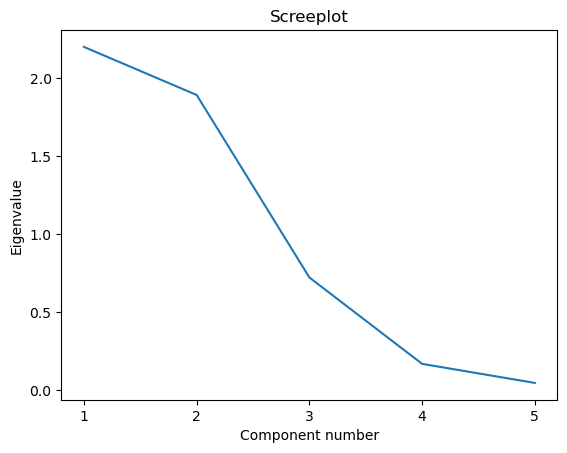

In [22]:
#Scree plot
import matplotlib.ticker as ticker
plt.clf()
fig1, ax1 = plt.subplots()
ax1.plot(np.arange(1, len(pca.explained_variance_)+1), pca.explained_variance_)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax1.set(xlabel = 'Component number', ylabel = 'Eigenvalue', title = 'Screeplot')
plt.show()

### Screeplot shows elbow at PC3 suggesting 1st 2 PCs to Extract.

## Extracting 2 PCs

In [23]:
#Extract only the two PCs
pca2 = PCA(n_components=2).fit(X)
scores2 = pca2.transform(X)
scores2

array([[ 2.24160878, -0.82718437],
       [ 4.00011316, -2.88179639],
       [ 0.87188442,  0.92486103],
       [ 3.67359239, -2.44279488],
       [ 2.30647824, -0.13856926],
       [ 3.41192261, -2.34360541],
       [ 1.08764991,  1.69059807],
       [ 3.88364005, -3.03799717],
       [ 1.30313156,  3.15888024],
       [ 3.13076219, -1.56230451],
       [ 1.69768424,  2.79271739],
       [ 4.1166028 , -2.54067379],
       [ 1.58260791,  2.35352569],
       [ 3.00136041, -2.03486391],
       [ 1.24437038,  1.46734479],
       [ 3.00410519, -2.23779081],
       [ 1.82463035,  0.41972776],
       [ 2.3859147 , -1.73363763],
       [ 1.75397566,  1.51701544],
       [ 3.45214255, -2.15027585],
       [ 1.5935102 ,  0.47350881],
       [ 2.39370359, -1.60192777],
       [ 0.91209101,  2.21896332],
       [ 2.44425764, -1.23489231],
       [ 1.12353625,  2.23340338],
       [ 2.3178137 , -1.5902569 ],
       [ 1.43077189,  1.12455599],
       [ 1.95279979, -0.47288564],
       [ 1.26365068,

In [24]:
# This function plots the loading plot.
# Pass original data dataframe and returns of PCA to this function. Optional width, height and margin
# This function returns the axes of the loading plot

def loadingplot(data, pca, width=5, height=5, margin=0.5):

    fig, ax = plt.subplots(figsize = (width,height))

    #Set limits for figure
    x_min = min(pca.components_[0,:].min(),0)-margin
    x_max = max(pca.components_[0,:].max(),0)+margin
    y_min = min(pca.components_[1,:].min(),0)-margin
    y_max = max(pca.components_[1,:].max(),0)+margin

    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)

    #Scaling factor for text position
    text_pos = 0.2

    for i, v in enumerate(pca.components_.T):
        ax.arrow(0, 0, v[0], v[1], head_width=0.1, head_length=0.1, linewidth=2, color='red')
        ax.text(v[0], v[1]+text_pos, data.columns[i], color='black', ha='center', va='center', fontsize=12)

    plt.plot([x_min, x_max], [0, 0], color='k', linestyle='--', linewidth=1)
    plt.plot([0, 0], [y_min, y_max], color='k', linestyle='--', linewidth=1)
    ax.set_xlabel("PC1", fontsize=14)
    ax.set_ylabel("PC2", fontsize=14)
    ax.set_title("Loading plot", fontsize = 14)    
    return ax

## Loading Plot

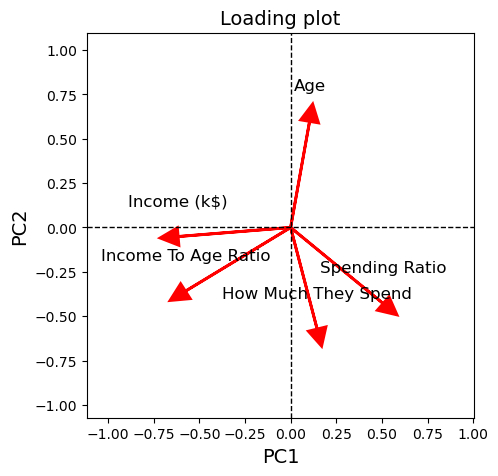

In [25]:
plt.clf
ax2 = loadingplot(X,pca2)
plt.show()

### Loading Plot allows us to visualize how each variable influences PC1 and PC2

In [26]:
scores2 = pd.DataFrame(data=scores2,columns=['PC1','PC2'])
scores2

,PC1,PC2
0,2.241609,-0.827184
1,4.000113,-2.881796
2,0.871884,0.924861
3,3.673592,-2.442795
4,2.306478,-0.138569
...,...,...
195,-2.492398,-1.371877
196,-2.693881,0.608054
197,-3.028937,-1.561645
198,-4.049159,-0.267120


## K-Means Clustering (Default Parameters)

### Advantages of K Means<br><br>1. Easy to Implement<br><br>2. Easy to Understand<br><br>3. Speed

In [27]:
# K-means Clustering
from sklearn.cluster import KMeans

#Fit a Kmeans model to the data
model = KMeans()
model.fit(scores2)
#Visualize the results
y_kmeans = model.predict(scores2)
# newDF = data_reduced.copy()
# newDF['Cluster'] = y_kmeans
# newDF

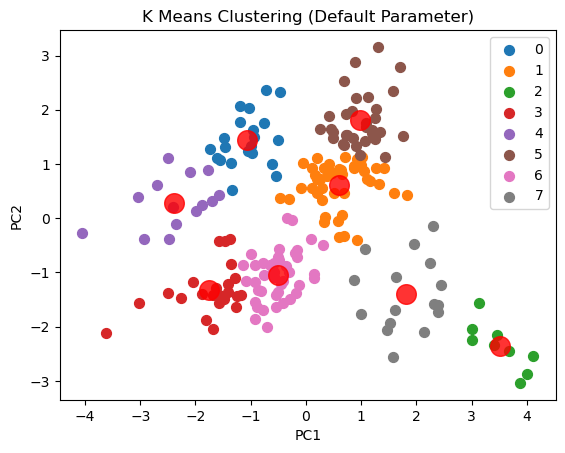

In [28]:
import matplotlib.pyplot as plt
labels = np.unique(y_kmeans)
for label in labels:
    mask = (y_kmeans == label)
    plt.scatter(scores2['PC1'][mask], scores2['PC2'][mask], s=50, cmap='viridis',label=label)
    
# plot centroids for each cluster
centers = model.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.8)
plt.title('K Means Clustering (Default Parameter)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

### The default parameters for K Means Clustering groups customers into 8 clusters.<br><br> Cluster 2 and 7 depicts young customers who spends a lot but have low income. Although Cluster 2 has a higher spending ratio than Cluster 7, Cluster 7 has a higher income than Cluster 2<br><br>Cluster 3 and 6 shows young customers who spends a lot but have a high income. Cluster 3 has a higher income than Cluster 6<br><br>Cluster 1 and 5 represents older customers with average income and moderate spending. Cluster 5 made up of senior citizens and Cluster 1 is made up of working adults<br><br>Cluster 4 and 0 are customers with very high income and low spending. Cluster 0 is made up of older individuals compared to Cluster 4

## Typical Customer's Profile of Different Clusters

In [29]:
newDF = data_reduced.copy()
newDF['Cluster'] = y_kmeans
clusterMean = newDF.groupby('Cluster').mean()
clusterMean

,Age,Income (k$),How Much They Spend,Spending Ratio,Income To Age Ratio
Cluster,,,,,
0,47.333333,81.476190,16.904762,0.208677,1.762228
1,44.209302,49.441860,46.348837,0.970555,1.135850
2,26.111111,18.555556,83.666667,4.551798,0.726781
3,27.956522,90.173913,67.173913,0.743313,3.243980
4,33.214286,98.357143,17.857143,0.179744,3.096984
5,58.750000,41.375000,33.250000,0.757666,0.695423
6,29.761905,68.166667,70.166667,1.026245,2.339409
7,25.125000,29.375000,70.812500,2.479142,1.216485


## Choosing The Optimal N Clusters

## Evaluation Metrics 1: Silhouette Coefficient

### Silhouette Coefficient measures the performance of the clustering algorithm. The higher the silhouette coefficient score is, the better the clusters are defined

In [30]:
#Clustering silhouette_score
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

#Trying different number of clusters
scores = []
clusters = []
wcss = []
for k in range(2, 11):
    model = KMeans(n_clusters=k).fit(scores2)
    label = model.labels_
    sil_coeff = silhouette_score(scores2, label, metric='euclidean')
    wcss_score = model.inertia_
    wcss.append(wcss_score)
    scores.append(sil_coeff)
    clusters.append(k)
    print("For n_clusters={}, The Silhouette Coefficient is {:.3f}".format(k, sil_coeff))

For n_clusters=2, The Silhouette Coefficient is 0.388
For n_clusters=3, The Silhouette Coefficient is 0.493
For n_clusters=4, The Silhouette Coefficient is 0.505
For n_clusters=5, The Silhouette Coefficient is 0.434
For n_clusters=6, The Silhouette Coefficient is 0.431
For n_clusters=7, The Silhouette Coefficient is 0.430
For n_clusters=8, The Silhouette Coefficient is 0.411
For n_clusters=9, The Silhouette Coefficient is 0.389
For n_clusters=10, The Silhouette Coefficient is 0.375


### We will choose N Cluster = 4 as it has the highest silhouette coefficient of 0.505

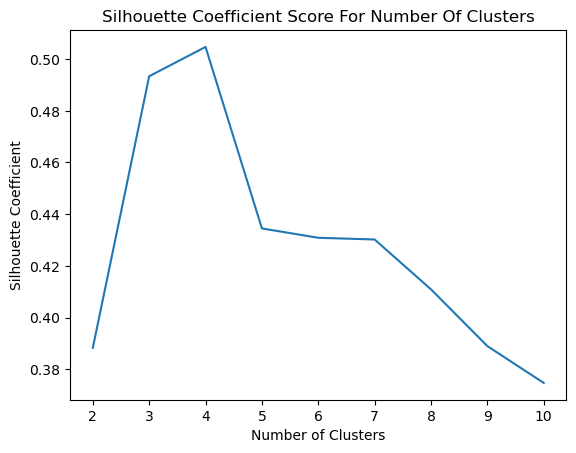

In [31]:
plt.plot(clusters,scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Coefficient')
plt.title('Silhouette Coefficient Score For Number Of Clusters')
plt.show()

## Elbow Plot

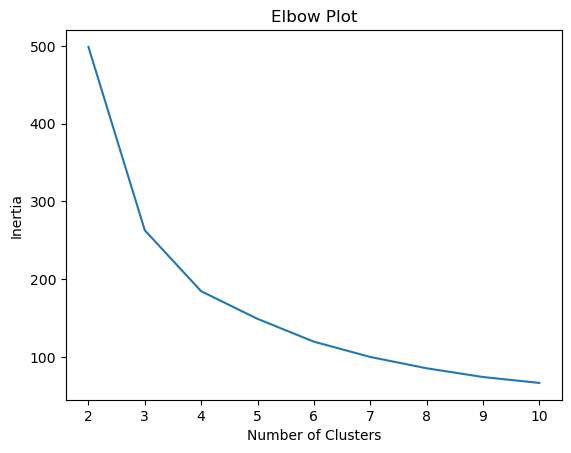

In [32]:
plt.plot(clusters,wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Plot')
plt.show()

### Elbow Plot shows elbow at N Cluster = 5, which suggests us to choose 4 N Clusters.

## Evaluation Metrics 2: Davies Bouldin Score

### Davies Bouldin Score measures the average similarity between clusters. The lower the Davies Bouldin Score is, the better the clustering quality is.

In [33]:
from sklearn.metrics import davies_bouldin_score
#Clustering silhouette_score
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

for k in range(2, 11):
    model = KMeans(n_clusters=k).fit(scores2)
    label = model.labels_
    davies = davies_bouldin_score(scores2, label)
    print("For n_clusters={}, The Davies Bouldin Score is {:.3f}".format(k, davies))

For n_clusters=2, The Davies Bouldin Score is 1.091
For n_clusters=3, The Davies Bouldin Score is 0.708
For n_clusters=4, The Davies Bouldin Score is 0.701
For n_clusters=5, The Davies Bouldin Score is 0.758
For n_clusters=6, The Davies Bouldin Score is 0.782
For n_clusters=7, The Davies Bouldin Score is 0.772
For n_clusters=8, The Davies Bouldin Score is 0.775
For n_clusters=9, The Davies Bouldin Score is 0.812
For n_clusters=10, The Davies Bouldin Score is 0.841


### Lowest Davies Bouldin Score of 0.701 at N Clusters = 4

## K Means Clustering (After Hyperparameter Tuning)

In [64]:
# K-Means Clustering
#Fit a Kmeans model to the data
model = KMeans(n_clusters=4)
model.fit(scores2)
#Visualize the results
y_kmeans = model.predict(scores2)

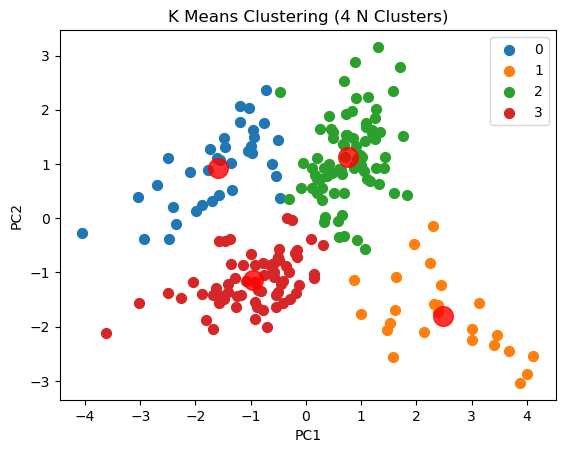

In [65]:
labels = np.unique(y_kmeans)
for label in labels:
    mask = (y_kmeans == label)
    plt.scatter(scores2['PC1'][mask], scores2['PC2'][mask], s=50, cmap='viridis',label=label)
    
centers = model.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.8)
plt.title('K Means Clustering (4 N Clusters)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

### Cluster 0: Middle-Aged Citizens and High Income. These customers have a low spending ratio despite having a high income. They are financially stable and knows how to budget well.<br><br>Cluster 1: Young And Undisciplined Customers. Despite, these customers having a low income, they are big spenders and have the highest spending ratio.<br><br> Cluster 2: Senior Citizens. These customer have moderate spending and have average income.<br><br> Cluster 3: Young and High Income Customers. These customers are from the above average income group and have a high spending

## Typical Customer's Profile Of Different Clusters

In [66]:
newDF = data_reduced.copy()
newDF['Cluster'] = y_kmeans
clusterMean = newDF.groupby('Cluster').mean()
clusterMean

,Age,Income (k$),How Much They Spend,Spending Ratio,Income To Age Ratio
Cluster,,,,,
0,41.085714,88.114286,18.114286,0.209735,2.312124
1,25.250000,24.916667,76.041667,3.294515,1.031114
2,50.434211,45.960526,40.644737,0.882910,0.944650
3,29.123077,75.953846,69.107692,0.926131,2.659488


## DBScan

### DBScan seperates cluster based on high and low density.<br><br> Advantages: DBScan is not easily influenced by outliers and noise 

In [37]:
from sklearn.cluster import DBSCAN
dbScan = DBSCAN()
dbScan.fit(scores2)

DBSCAN()

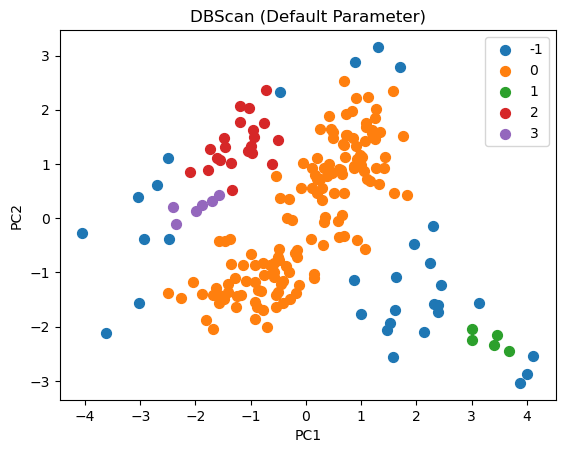

In [38]:
import matplotlib.pyplot as plt

labels = np.unique(dbScan.labels_)
for label in labels:
    mask = (dbScan.labels_ == label)
    plt.scatter(scores2['PC1'][mask], scores2['PC2'][mask], s=50, cmap='viridis',label=label)
    
plt.title('DBScan (Default Parameter)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

In [39]:
from sklearn.metrics import silhouette_score
print('DBScan Silhouette Score')
print(silhouette_score(scores2,dbScan.labels_))

DBScan Silhouette Score
0.039723057052927946


In [40]:
#Clustering silhouette_score
from sklearn.metrics import silhouette_score
for k in range(2,11):
    model = DBSCAN(min_samples=k).fit(scores2)
    label = model.labels_
    sil_coeff = silhouette_score(scores2, label, metric='euclidean')
    print("For min_samples={}, The Silhouette Coefficient is {:.3f}".format(k, sil_coeff))

For min_samples=2, The Silhouette Coefficient is 0.240
For min_samples=3, The Silhouette Coefficient is 0.240
For min_samples=4, The Silhouette Coefficient is 0.277
For min_samples=5, The Silhouette Coefficient is 0.040
For min_samples=6, The Silhouette Coefficient is 0.158
For min_samples=7, The Silhouette Coefficient is 0.134
For min_samples=8, The Silhouette Coefficient is 0.129
For min_samples=9, The Silhouette Coefficient is 0.332
For min_samples=10, The Silhouette Coefficient is 0.324


### Highest silhouette score is only 0.332 which is not very high.

### DBScan is not effective for customer segmentation due to the dataset having large difference of density

## Hierachical Clustering (Agglomerative Clustering)

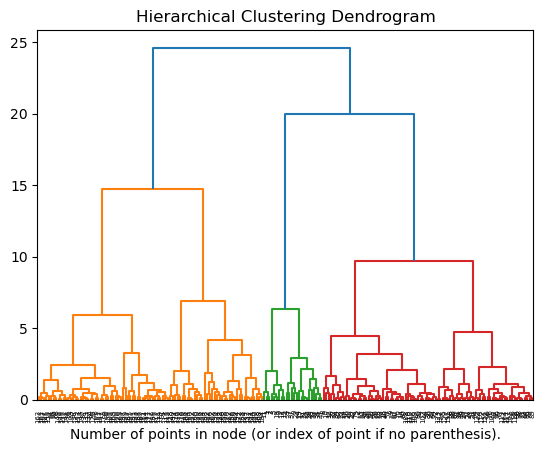

In [41]:
# Source: https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html#sphx-glr-auto-examples-cluster-plot-agglomerative-dendrogram-py
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(scores2)

plt.title("Hierarchical Clustering Dendrogram")
plot_dendrogram(model, truncate_mode="level")
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

### 4 Clusters are produced, upon cutting a straight line at 10

## Agglomerative Clustering (Default Parameters)

In [42]:
model = AgglomerativeClustering()
model = model.fit(scores2)

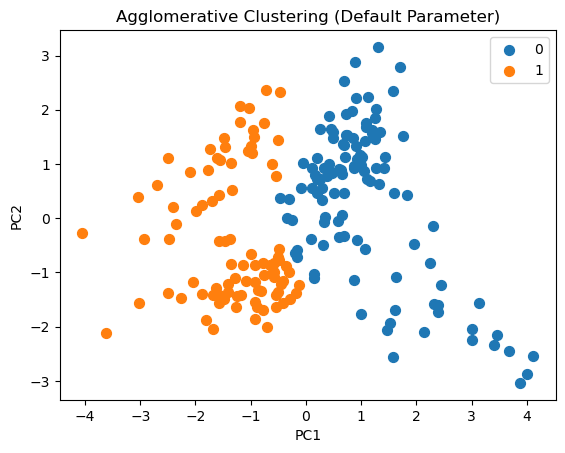

In [43]:
import matplotlib.pyplot as plt

labels = np.unique(model.labels_)
for label in labels:
    mask = (model.labels_ == label)
    plt.scatter(scores2['PC1'][mask], scores2['PC2'][mask], s=50, cmap='viridis',label=label)

plt.title('Agglomerative Clustering (Default Parameter)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

## Agglomerative Clustering's Customer Profile (Before Hyperparameter Tuning)

In [44]:
newDF2 = data_reduced.copy()
newDF2['Cluster'] = model.labels_
clusterMean = newDF2.groupby('Cluster').mean()
clusterMean

,Age,Income (k$),How Much They Spend,Spending Ratio,Income To Age Ratio
Cluster,,,,,
0,43.422018,42.715596,50.862385,1.431788,1.040546
1,33.373626,81.934066,49.406593,0.633449,2.603424


### Customers in Cluster 0 have low income and high spending ratio.<br><br>Customers in Cluster 1 have high income and low spending ratio.

In [45]:
#Clustering silhouette_score
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

for k in range(2, 11):
    model = AgglomerativeClustering(n_clusters=k)
    label = model.fit_predict(scores2)
    sil_coeff = silhouette_score(scores2, label, metric='euclidean')
    print("For n_clusters={}, The Silhouette Coefficient is {:.3f}".format(k, sil_coeff))

For n_clusters=2, The Silhouette Coefficient is 0.364
For n_clusters=3, The Silhouette Coefficient is 0.427
For n_clusters=4, The Silhouette Coefficient is 0.467
For n_clusters=5, The Silhouette Coefficient is 0.414
For n_clusters=6, The Silhouette Coefficient is 0.411
For n_clusters=7, The Silhouette Coefficient is 0.408
For n_clusters=8, The Silhouette Coefficient is 0.380
For n_clusters=9, The Silhouette Coefficient is 0.363
For n_clusters=10, The Silhouette Coefficient is 0.361


### We will choose the N Cluster = 4 as it has the highest silhouette coefficient of 0.467

## Agglomerative Clustering (After Hyperparameter Tuning)

In [46]:
model = AgglomerativeClustering(n_clusters=4)
model = model.fit(scores2)

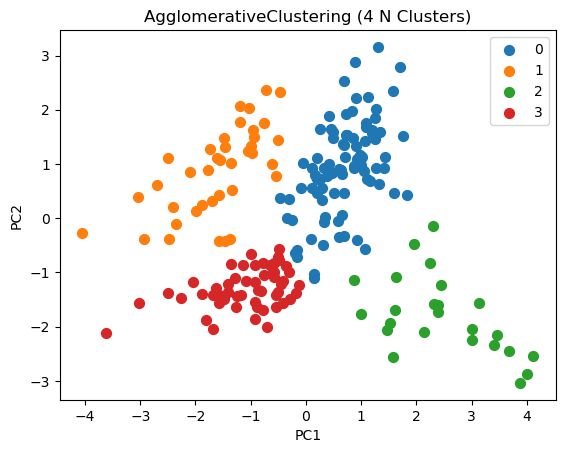

In [47]:
import matplotlib.pyplot as plt

labels = np.unique(model.labels_)
for label in labels:
    mask = (model.labels_ == label)
    plt.scatter(scores2['PC1'][mask], scores2['PC2'][mask], s=50, cmap='viridis',label=label)

plt.title('AgglomerativeClustering (4 N Clusters)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

## Agglomerative Clustering's Customer Profile (After Hyperparameter Tuning)

In [48]:
newDF2 = data_reduced.copy()
newDF2['Cluster'] = model.labels_
clusterMean = newDF2.groupby('Cluster').mean()
clusterMean

,Age,Income (k$),How Much They Spend,Spending Ratio,Income To Age Ratio
Cluster,,,,,
0,48.552941,47.741176,43.752941,0.905842,1.043210
1,40.394737,87.000000,18.631579,0.218723,2.342167
2,25.250000,24.916667,76.041667,3.294515,1.031114
3,28.339623,78.301887,71.471698,0.930799,2.790741


## Gaussian Mixture Model

In [49]:
from sklearn.mixture import GaussianMixture
gm = GaussianMixture()
gm.fit(scores2)
clusterLabel = gm.predict(scores2)

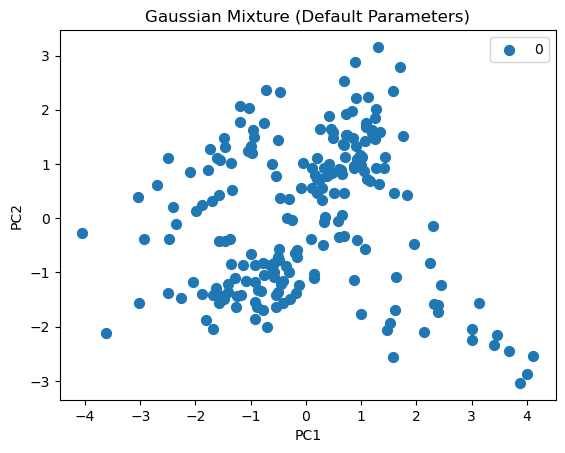

In [50]:
import matplotlib.pyplot as plt

labels = np.unique(clusterLabel)
for label in labels:
    mask = (clusterLabel == label)
    plt.scatter(scores2['PC1'][mask], scores2['PC2'][mask], s=50, cmap='viridis',label=label)


plt.title('Gaussian Mixture (Default Parameters)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

### The default parameter for N Cluster for Gaussian Mixture is 1. There is not much insights for it.

## We will now run a for loop to determine the best number of N-Components for Gaussian Mixture Model

In [51]:
#Clustering silhouette_score
from sklearn.metrics import silhouette_score

for k in range(2, 11):
    model = GaussianMixture(n_components=k)
    label = model.fit_predict(scores2)
    sil_coeff = silhouette_score(scores2, label, metric='euclidean')
    print("For n_clusters={}, The Silhouette Coefficient is {:.3f}".format(k, sil_coeff))

For n_clusters=2, The Silhouette Coefficient is 0.392
For n_clusters=3, The Silhouette Coefficient is 0.424
For n_clusters=4, The Silhouette Coefficient is 0.501
For n_clusters=5, The Silhouette Coefficient is 0.359
For n_clusters=6, The Silhouette Coefficient is 0.384
For n_clusters=7, The Silhouette Coefficient is 0.388
For n_clusters=8, The Silhouette Coefficient is 0.334
For n_clusters=9, The Silhouette Coefficient is 0.372
For n_clusters=10, The Silhouette Coefficient is 0.315


### N cluster = 4 has the highest silhouette coefficient of 0.501

## Gaussian Mixture Model (After Hyperparameter tuning)

In [52]:
from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components=4)
gm.fit(scores2)
clusterLabel = gm.predict(scores2)

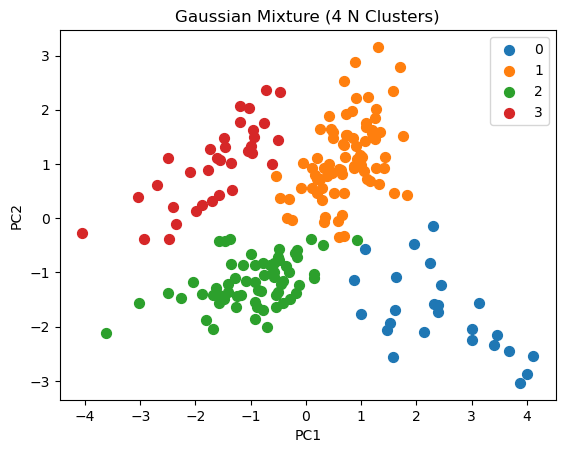

In [53]:
import matplotlib.pyplot as plt

labels = np.unique(clusterLabel)
for label in labels:
    mask = (clusterLabel == label)
    plt.scatter(scores2['PC1'][mask], scores2['PC2'][mask], s=50, cmap='viridis',label=label)

plt.title('Gaussian Mixture (4 N Clusters)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

### Cluster 0: Young And Undisciplined Customers. Despite, these customers having a low income, they are big spenders and have the highest spending ratio.<br><br>Cluster 1: Senior Citizens. These customer have moderate spending and have average income.<br><br>Cluster 2: Young and High Income Customers. These customers are from the above average income group and have a high spending.<br><br>Cluster 3: Middle-Aged Citizens and High Income. These customers have a low spending ratio despite having a high income. They are financially stable and knows how to budget well.

In [54]:
sil_coeff = silhouette_score(scores2, clusterLabel, metric='euclidean')
print(f'Silhouette Coefficient: {sil_coeff}')

Silhouette Coefficient: 0.5014084326707149


## Gaussian Mixture's Customer Profile (After Hyperparameter Tuning)

In [55]:
newDF3 = data_reduced.copy()
newDF3['Cluster'] = clusterLabel
clusterMean = newDF3.groupby('Cluster').mean()
clusterMean

,Age,Income (k$),How Much They Spend,Spending Ratio,Income To Age Ratio
Cluster,,,,,
0,25.480000,25.480000,75.440000,3.225298,1.040192
1,50.168831,46.857143,40.675325,0.864729,0.974981
2,28.968750,75.781250,69.562500,0.938851,2.664678
3,41.647059,88.735294,16.764706,0.188402,2.315100


## Spectral Clustering

In [56]:
from sklearn.cluster import SpectralClustering
spectral = SpectralClustering()
spectralCluster = spectral.fit_predict(scores2)

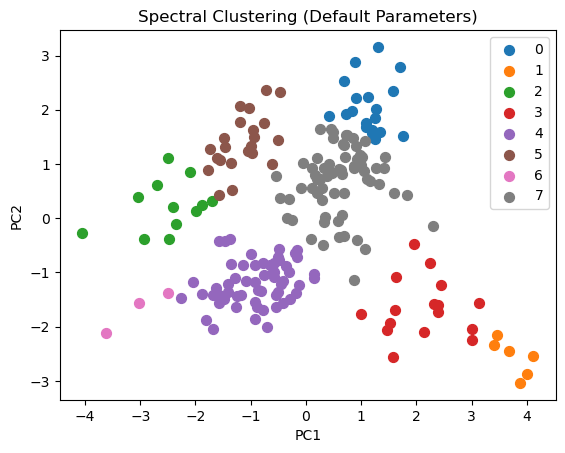

In [57]:
import matplotlib.pyplot as plt

labels = np.unique(spectralCluster)
for label in labels:
    mask = (spectralCluster == label)
    plt.scatter(scores2['PC1'][mask], scores2['PC2'][mask], s=50, cmap='viridis',label=label)

plt.title('Spectral Clustering (Default Parameters)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

## Spectral Clustering's Customer Profile (Before Hyperparameter Tuning)

In [58]:
newDF3 = data_reduced.copy()
newDF3['Cluster'] = spectralCluster
clusterMean = newDF3.groupby('Cluster').mean()
clusterMean

,Age,Income (k$),How Much They Spend,Spending Ratio,Income To Age Ratio
Cluster,,,,,
0,58.894737,34.578947,26.157895,0.690645,0.578936
1,26.500000,18.000000,87.500000,4.896118,0.694212
2,32.750000,100.250000,17.750000,0.174260,3.210370
3,24.500000,27.125000,74.687500,2.854502,1.150504
4,28.672414,74.500000,69.741379,0.942470,2.653868
5,46.500000,82.454545,16.227273,0.196116,1.826771
6,32.333333,127.666667,78.666667,0.617158,3.977579
7,45.687500,49.875000,46.437500,0.978396,1.127930


## We will now run a for loop to determine the best number of cluster for Spectral Clustering.

In [59]:
#Clustering silhouette_score
from sklearn.metrics import silhouette_score

for k in range(2, 11):
    model = SpectralClustering(n_clusters=k)
    label = model.fit_predict(scores2)
    sil_coeff = silhouette_score(scores2, label, metric='euclidean')
    print("For n_clusters={}, The Silhouette Coefficient is {:.3f}".format(k, sil_coeff))

For n_clusters=2, The Silhouette Coefficient is 0.464
For n_clusters=3, The Silhouette Coefficient is 0.480
For n_clusters=4, The Silhouette Coefficient is 0.496
For n_clusters=5, The Silhouette Coefficient is 0.488
For n_clusters=6, The Silhouette Coefficient is 0.466
For n_clusters=7, The Silhouette Coefficient is 0.411
For n_clusters=8, The Silhouette Coefficient is 0.393
For n_clusters=9, The Silhouette Coefficient is 0.387
For n_clusters=10, The Silhouette Coefficient is 0.358


### N Cluster = 4 has the highest silhouette coefficient of 0.496.

## Spectral Clustering (After Hyperparameter Tuning)

In [60]:
from sklearn.cluster import SpectralClustering
spectral = SpectralClustering(n_clusters=4)
spectralCluster = spectral.fit_predict(scores2)

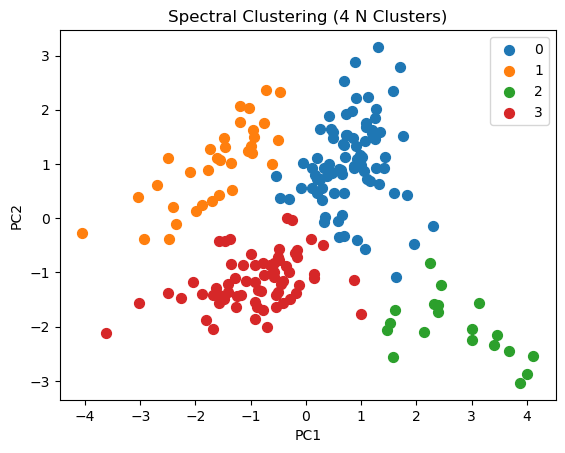

In [61]:
import matplotlib.pyplot as plt

labels = np.unique(spectralCluster)
for label in labels:
    mask = (spectralCluster == label)
    plt.scatter(scores2['PC1'][mask], scores2['PC2'][mask], s=50, cmap='viridis',label=label)

plt.title('Spectral Clustering (4 N Clusters)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

In [62]:
sil_coeff = silhouette_score(scores2, spectralCluster, metric='euclidean')
print(f'Silhouette Coefficient: {sil_coeff}')

Silhouette Coefficient: 0.4958584321564042


## Spectral Clustering's Customer Profile (After Hyperparameter Tuning)

In [63]:
newDF3 = data_reduced.copy()
newDF3['Cluster'] = spectralCluster
clusterMean = newDF3.groupby('Cluster').mean()
clusterMean

,Age,Income (k$),How Much They Spend,Spending Ratio,Income To Age Ratio
Cluster,,,,,
0,49.387500,45.487500,41.587500,0.933935,0.956075
1,41.647059,88.735294,16.764706,0.188402,2.315100
2,24.526316,23.315789,79.526316,3.615583,0.988948
3,28.910448,74.820896,69.134328,0.953615,2.631966


# Conclusion

### Ultimately, we will use K Means Clustering as our final model.<br><br>1. It has the highest silhouette coefficient of 0.505<br><br>2. It has the lowest Davies Bouldin Score of 0.701<br><br>3. K-Means is easy to implement and interpret.

### Cluster 0 and 3 from the K-Means Algorithm are the most valuable segment to the shopping mall.<br>Cluster 0 holds a group of middle-aged customers with high income but not spending much.<br>Cluster 3 holds customers with high income and have high spending.<br><br>Recommendations:<br><br>1. The shopping mall can induce Cluster 0 to spend more by targeting advertisements and loyalty programs that offer discounts to attract them to frequently shop in the mall.<br><br>2. As for Cluster 3, these customers have high spending habits. The mall can gather customer feedbacks to enhance the shopping experience and also create a special Membership for these customers in Cluster 3 for benefits such as discounts.

### This customer segmentation journey has been very fruitful, I have learned more in depth about how I can apply unsupervised learning to real world applications.

## 